<a href="https://colab.research.google.com/github/rezakhanahmadi342341/projects/blob/main/image_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - TopKCategoricalAccuracy: 0.8205 - acc: 0.3229 - loss: 1.9859 - val_TopKCategoricalAccuracy: 0.9389 - val_acc: 0.5394 - val_loss: 1.2946
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - TopKCategoricalAccuracy: 0.9413 - acc: 0.5424 - loss: 1.2981 - val_TopKCategoricalAccuracy: 0.9611 - val_acc: 0.6027 - val_loss: 1.1296
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - TopKCategoricalAccuracy: 0.9545 - acc: 0.5977 - loss: 1.1526 - val_TopKCategoricalAccuracy: 0.9674 - val_acc: 0.6227 - val_loss: 1.0684
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - TopKCategoricalAccuracy: 0.9630 - acc: 0.6299 - loss: 1.0604 - val_TopKCategoricalAccuracy: 0.9677 - val_acc: 0.6592 - val_loss: 0.9779
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - TopKCategoricalAccuracy: 0.9670 - acc: 0.6543 - loss: 0.9988 - val_TopKCategoricalAccuracy: 0.9741 - val_acc: 0.6988 - val_loss: 0.8804
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━

<Axes: >

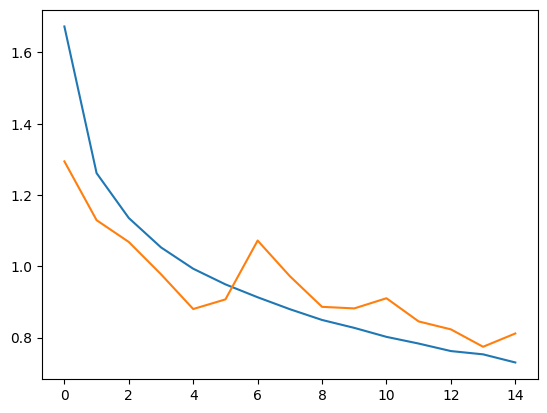

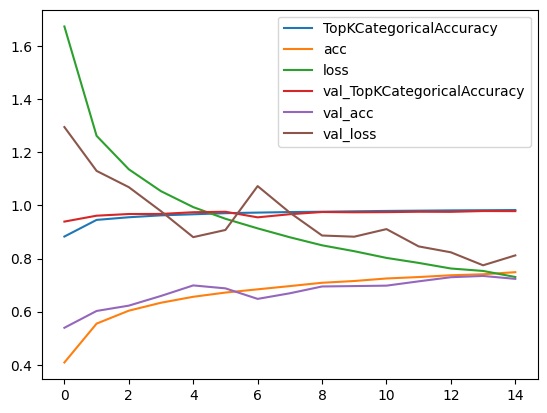

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

scale = OneHotEncoder(sparse_output=False)
y_train = scale.fit_transform(y_train)
y_test = scale.fit_transform(y_test)

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='valid', input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), padding='valid', input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, (3,3), padding='valid', input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, (3,3), padding='valid', input_shape=[32, 32, 3]),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc', 'TopKCategoricalAccuracy'])
early_stopping = keras.callbacks.EarlyStopping(patience=100)
hist = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test), callbacks=early_stopping)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

import pandas as pd

pd.DataFrame(hist.history).plot()